In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [2]:
import pandas as pd
from IPython.display import display
dict = {"one":pd.Series([1,2,3], index=["a", 'b', 'c']), "two":pd.Series([4,5,6,7], index=["a","b","c", "d"])}
df = pd.DataFrame.from_dict(dict)
display(df.fillna(0))

row = df.iloc[1]
df.add(row, axis=1)

display(df.loc["a"])


,one,two
a,1.0,4
b,2.0,5
c,3.0,6
d,0.0,7


one    1.0
two    4.0
Name: a, dtype: float64

In [3]:
def split_name(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series( (f_name, l_name), 
                          index=["First Name", "Last Name"])
    names = df["Contact"].apply(get_names)
    df[names.columns] = names
    return df

In [4]:
arr_3 = np.random.randint(10, 50, size=(2,3))
df = pd.DataFrame(arr_3, ['A', 'B'], ['C','D','E'])


df.rename(columns={'C':"Men", 'D':"Women"})

,Men,Women,E
A,34,11,17
B,24,20,21


In [5]:
days = ['Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 3']
meals = [1, 2, 3, 4,1]
hier_index = list(zip(days, meals))

hier_index = pd.MultiIndex.from_tuples(hier_index)

arr_5 = np.random.randint(500, 700, size=(5, 2))
df_9 = pd.DataFrame(arr_5, hier_index, ['M', 'F'])
df_9

M    F
Day 1 1  514  639
      2  609  610
Day 2 3  624  524
      4  587  693
Day 3 1  690  617

In [6]:
df_9.index.names = ['Day', 'Meal']
df_9.columns.names = ["Gender"]
df_9

Gender        M    F
Day   Meal          
Day 1 1     514  639
      2     609  610
Day 2 3     624  524
      4     587  693
Day 3 1     690  617

In [7]:
df_9.xs(1, level='Meal')

Gender,M,F
Day,,
Day 1,514,639
Day 3,690,617


In [8]:
dict_6 = {'A':['Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 1','Day 2'],
          'B':[1, 2, 3, 1,2,3],
          'C':['M','F',"M",'F', "M", "F"],
          'D':[1,2,3,4,5,6]}
df_14 = pd.DataFrame(dict_6)
df_14 = df_14.pivot_table(values='D', index=['A',"B"], columns=["C"])
df_14


C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  5.0
Day 2 1  4.0  NaN
      3  6.0  3.0

In [9]:
df_14.dropna(axis=1,thresh=2)

C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  5.0
Day 2 1  4.0  NaN
      3  6.0  3.0

In [10]:
df_14.fillna(value=0)

C          F    M
A     B          
Day 1 1  0.0  1.0
      2  2.0  5.0
Day 2 1  4.0  0.0
      3  6.0  3.0

,A,B,C
0.0,0.948571,0.351471,0.024611
0.1,0.147216,0.641000,0.038540
0.2,0.416314,0.322759,0.320174
0.3,0.486077,0.350719,0.956629
0.4,0.814538,0.824061,0.161361
0.5,0.475604,0.126112,0.419241
0.6,0.563676,0.409245,0.067948
0.7,0.736121,0.748595,0.264836
0.8,0.849449,0.517050,0.206175
0.9,0.074334,0.392024,0.095198


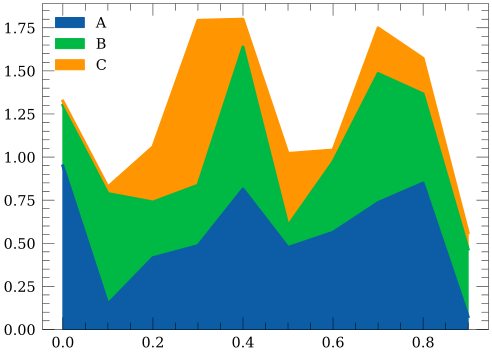

In [11]:
df = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'],index=np.arange(0,1, 0.1))
df.plot.area()
df

<AxesSubplot:xlabel='C', ylabel='D'>

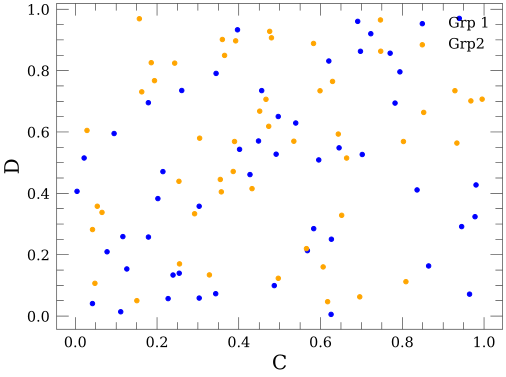

In [12]:
df_15 = pd.DataFrame(np.random.rand(50, 4),
                     columns=['A', 'B', 'C', 'D'])
ax = df_15.plot.scatter(x='A', y='B', color='blue',label="Grp 1")
df_15.plot.scatter(x='C', y='D', color="Orange", label='Grp2', ax=ax)

In [22]:
df_16 = pd.DataFrame(np.random.randint(0,10,size=(50,4)),
                     columns=['A', 'B', 'C', 'D'])
df_16["A"].value_counts(normalize=True)

2    0.20
6    0.16
3    0.14
0    0.12
5    0.10
7    0.08
1    0.08
9    0.06
8    0.04
4    0.02
Name: A, dtype: float64

In [26]:
display(df_16.apply(lambda row:row["A"]+10, axis=1))

0     16
1     12
2     16
3     17
4     11
5     10
6     16
7     14
8     12
9     10
10    12
11    15
12    13
13    13
14    19
15    18
16    16
17    12
18    12
19    10
20    16
21    17
22    11
23    12
24    13
25    18
26    16
27    10
28    19
29    10
30    13
31    16
32    19
33    15
34    12
35    13
36    13
37    11
38    12
39    15
40    15
41    17
42    13
43    16
44    12
45    11
46    17
47    12
48    10
49    15
dtype: int64

In [27]:
df_16.agg(["sum", "count"])

,A,B,C,D
sum,193,181,167,202
count,50,50,50,50


In [33]:
df_16["sum_B"] =df_16.groupby("A")["B"].transform("sum")
df_16

,A,B,C,D,sum_B
0,6,1,1,3,30
1,2,8,1,3,50
2,6,2,2,1,30
3,7,6,2,4,12
4,1,3,4,9,10
5,0,6,3,8,18
6,6,1,5,5,30
7,4,1,6,6,1
8,2,0,8,0,50
9,0,3,7,4,18
